In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('final_feat.xlsx')

In [3]:
df1=df[['Completed Jobs','TMAX','Avg Sales','tech_count','Income_y']]

In [4]:
df1.head()

,Completed Jobs,TMAX,Avg Sales,tech_count,Income_y
0,57,65,3617.444828,59,23933.54
1,77,71,1781.345385,40,65232.03
2,55,69,459.248750,21,26195.32
3,6,69,846.000000,9,264.00
4,73,77,1820.060789,60,48506.16


In [5]:
df1=df1.drop_duplicates(ignore_index=True)

In [6]:

df1['f1']=np.sqrt(df1['Completed Jobs']**3)*np.abs(df1['Avg Sales'])
df1['f2']=np.abs(np.sqrt(df1['Completed Jobs']) - np.sqrt(df1['tech_count']))
df1['f3']=np.log(np.sqrt(df1['Completed Jobs'])*df1['TMAX']**3)

In [7]:
df1.columns

Index(['Completed Jobs', 'TMAX', 'Avg Sales', 'tech_count', 'Income_y', 'f1',
       'f2', 'f3'],
      dtype='object')

In [159]:
df_2=df1[[ 'Completed Jobs','Avg Sales','Income_y', 'f1',
       'f2', 'f3']]

In [160]:
train=df_2[0:300]
test=df_2[300:]

In [161]:
y=train['Income_y']
X=train.drop(['Income_y'],axis=1)

In [162]:
y_=test['Income_y']
X_=test.drop(['Income_y'],axis=1)

In [163]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [164]:
from sklearn.tree import DecisionTreeRegressor


In [165]:
dtm = DecisionTreeRegressor()


In [166]:
dtm.fit(X_train,y_train)

DecisionTreeRegressor()

In [167]:
dtm.score(X_train,y_train)

1.0

In [168]:
dtm.score(X_test,y_test)

0.6534392837346688

In [169]:
dtm.score(X_,y_)

-0.07838331454003855

In [170]:
from sklearn.model_selection import GridSearchCV, cross_val_score


# Hyperparameter tuning

In [171]:
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }

In [172]:
grid_cv_dtm = GridSearchCV(dtm, param_grid, cv=5)


In [173]:
grid_cv_dtm.fit(X,y)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 6, 8],
                         'max_leaf_nodes': [5, 20, 100],
                         'min_samples_leaf': [20, 40, 100],
                         'min_samples_split': [10, 20, 40]})

In [174]:
grid_cv_dtm.best_params_

{'criterion': 'mae',
 'max_depth': 6,
 'max_leaf_nodes': 20,
 'min_samples_leaf': 20,
 'min_samples_split': 10}

In [175]:
dtm_1= DecisionTreeRegressor(criterion='mae',max_depth=6,max_leaf_nodes=20,min_samples_leaf=20,min_samples_split=20)


In [176]:
dtm_1.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mae', max_depth=6, max_leaf_nodes=20,
                      min_samples_leaf=20, min_samples_split=20)

In [177]:
dtm_1.score(X_train,y_train)

0.7009630363473612

In [178]:
dtm_1.score(X_test,y_test)

0.7309213813592342

In [179]:
dtm_1.score(X_,y_)

0.3952829407623636

In [180]:
y_pred_1=dtm_1.predict(X_)

In [181]:
from sklearn import metrics 

# RMSE and MAE
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_,y_pred_1)))
print('MAE:',metrics.mean_absolute_error(y_,y_pred_1))

RMSE: 30063.43875477294
MAE: 21597.711022727275


In [182]:
comp_1=pd.DataFrame({'Actual':y_,'Predicted':y_pred_1})

<AxesSubplot:>

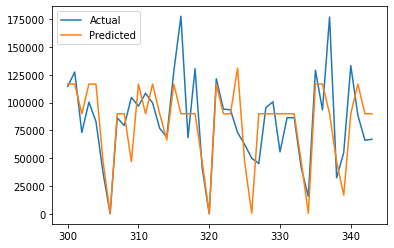

In [183]:
comp_1.plot()

In [184]:
comp_1['Error']=comp_1['Actual']-comp_1['Predicted']

In [185]:
comp_1

,Actual,Predicted,Error
300,114534.21,116605.015,-2070.805
301,127412.10,116605.015,10807.085
302,73107.94,89956.530,-16848.590
303,100335.70,116605.015,-16269.315
304,82920.44,116605.015,-33684.575
305,36992.00,46897.630,-9905.630
306,326.00,549.000,-223.000
307,86287.17,89956.530,-3669.360
308,79380.38,89956.530,-10576.150
309,104509.01,46897.630,57611.380
